In [4]:
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import numpy as np

# Инициализация симплекс-таблицы
def init_simplex_table():
    # Матрица ограничений (левая часть)
    A = np.array([
        [-3, 2, 1, 0, 0],   # -3x1 + 2x2 + s1 = 6
        [1, -4, 0, 1, 0],   # x1 - 4x2 + s2 = 2
        [1, -1, 0, 0, 1]    # x1 - x2 + s3 = 5
    ])
    
    # Вектор ограничений (правая часть)
    b = np.array([6, 2, 5])

    # Целевая функция: z = 2x1 + 3x2 (заметим, что мы минимизируем -z)
    c = np.array([-2, -3, 0, 0, 0])  # Для максимизации берем противоположные знаки

    # Создаем симплекс-таблицу
    num_constraints, num_vars = A.shape
    simplex_table = np.zeros((num_constraints + 1, num_vars + 1))
    
    # Заполняем таблицу
    simplex_table[:-1, :-1] = A
    simplex_table[:-1, -1] = b
    simplex_table[-1, :-1] = c
    
    return simplex_table

# Поиск ведущего столбца
def find_pivot_column(table):
    last_row = table[-1, :-1]
    return np.argmin(last_row)

# Поиск ведущей строки
def find_pivot_row(table, pivot_col):
    column = table[:-1, pivot_col]
    rhs = table[:-1, -1]
    
    # Выбираем минимальное положительное отношение rhs / column
    ratios = np.divide(rhs, column, where=(column > 0), out=np.full_like(rhs, np.inf))
    return np.argmin(ratios)

# Выполнение симплекс-шага
def perform_simplex_step(table, pivot_row, pivot_col):
    # Нормализуем ведущий элемент
    pivot_element = table[pivot_row, pivot_col]
    table[pivot_row, :] /= pivot_element
    
    # Обнуляем остальные элементы в столбце
    for i in range(table.shape[0]):
        if i != pivot_row:
            row_factor = table[i, pivot_col]
            table[i, :] -= row_factor * table[pivot_row, :]

# Симплекс-метод
def simplex_method(table):
    while np.min(table[-1, :-1]) < 0:  # Пока есть отрицательные элементы в строке цели
        pivot_col = find_pivot_column(table)
        pivot_row = find_pivot_row(table, pivot_col)
        perform_simplex_step(table, pivot_row, pivot_col)
    
    return table

# Инициализация таблицы
simplex_table = init_simplex_table()

# Выполнение симплекс-метода
final_table = simplex_method(simplex_table)

# Вывод результата
solution = final_table[:-1, -1]  # Решение (значения переменных)
optimal_value = final_table[-1, -1]  # Оптимальное значение целевой функции

print("Оптимальное решение:", solution)
print("Оптимальное значение целевой функции:", -optimal_value)  # Умножаем на -1 для правильного значения


KeyboardInterrupt: 

In [10]:
from scipy.optimize import linprog

# Коэффициенты целевой функции (мы минимизируем -z, поэтому коэффициенты с минусом)
c = [-2, -3]

# Коэффициенты ограничений (левая часть)
A = [
    [-3, 2],  # -3x1 + 2x2 <= 6
    [1, -4],  # x1 - 4x2 <= 2
    [1, -1]   # x1 - x2 <= 5
]

# Правая часть ограничений
b = [6, 2, 5]

# Границы для переменных x1 и x2 (они неотрицательные)
x_bounds = [(0, None), (0, None)]

# Решение задачи линейного программирования
result = linprog(c, A_ub=A, b_ub=b, bounds=x_bounds, method='simplex')

# Вывод результатов
if result.success:
    print("Оптимальное решение:")
    print(f"x1 = {result.x[0]:.4f}")
    print(f"x2 = {result.x[1]:.4f}")
    print(f"Максимальное значение целевой функции: {-result.fun:.4f}")  # Изменяем знак обратно
else:
    print("Решение не найдено:", result.message)


Решение не найдено: Optimization failed. The problem appears to be unbounded.


C:\Users\grund\AppData\Local\Temp\ipykernel_5048\3370332386.py:20: DeprecationWarning: `method='simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  result = linprog(c, A_ub=A, b_ub=b, bounds=x_bounds, method='simplex')


In [10]:
from scipy.optimize import linprog


c = [-1, 3]


A = [
    [1, 2],  
    [-1, 1], 
    [1, 1]   
]

b = [4, -1, 8]

x_bounds = [(0, None), (0, None)]

result = linprog(c, A_ub=A, b_ub=b, bounds=x_bounds, method='simplex')

# Вывод результатов
if result.success:
    print("Оптимальное решение:")
    print(f"x1 = {result.x[0]:.4f}")
    print(f"x2 = {result.x[1]:.4f}")
    print(f"Максимальное значение целевой функции: {-result.fun:.4f}")
else:
    print("Решение не найдено:", result.message)

Оптимальное решение:
x1 = 4.0000
x2 = 0.0000
Максимальное значение целевой функции: 4.0000


C:\Users\grund\AppData\Local\Temp\ipykernel_12400\1696752300.py:20: DeprecationWarning: `method='simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  result = linprog(c, A_ub=A, b_ub=b, bounds=x_bounds, method='simplex')


In [15]:
import numpy as np

# Data from the table
x_i = np.array([8, 11, 12, 9, 8, 8, 8, 9, 9, 12])
y_i = np.array([5, 10, 10, 7, 5, 6, 5, 5, 6, 8])

# Calculate the correlation coefficient
correlation_matrix = np.corrcoef(x_i, y_i)
correlation_coefficient = correlation_matrix[0, 1]

# Print the correlation coefficient rounded to 3 decimal places
print(f"Correlation coefficient: {correlation_coefficient:.3f}")


Correlation coefficient: 0.883


In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Data from the table
x_i = np.array([8, 11, 12, 9, 8, 8, 9, 9, 8, 12]).reshape(-1, 1)  # Reshape for sklearn
y_i = np.array([5, 10, 10, 7, 5, 6, 6, 5, 6, 8])

# Fit linear model
model = LinearRegression()
model.fit(x_i, y_i)

# Predict y values based on the model
y_pred = model.predict(x_i)

# Calculate R^2 (coefficient of determination)
r2 = r2_score(y_i, y_pred)

# Print the R^2 value rounded to 2 decimal places
print(f"Coefficient of Determination (R^2): {r2:.2f}")


Coefficient of Determination (R^2): 0.75


In [7]:
import pandas as pd

# Input data from the table in the image
data = {
    'x_i': [8, 11, 12, 9, 8, 8, 9, 9, 8, 12],
    'y_i': [5, 10, 10, 7, 5, 6, 6, 5, 6, 8]
}

# Create a dataframe
df = pd.DataFrame(data)

# Calculate the correlation coefficient
correlation = df['x_i'].corr(df['y_i'])

# Return the result rounded to 3 decimal places
round(correlation, 3)

np.float64(0.866)

In [22]:
np.array([8, 11, 12, 9, 8, 8, 8, 9, 9, 12]).reshape(-1, 1)

array([[ 8],
       [11],
       [12],
       [ 9],
       [ 8],
       [ 8],
       [ 8],
       [ 9],
       [ 9],
       [12]])

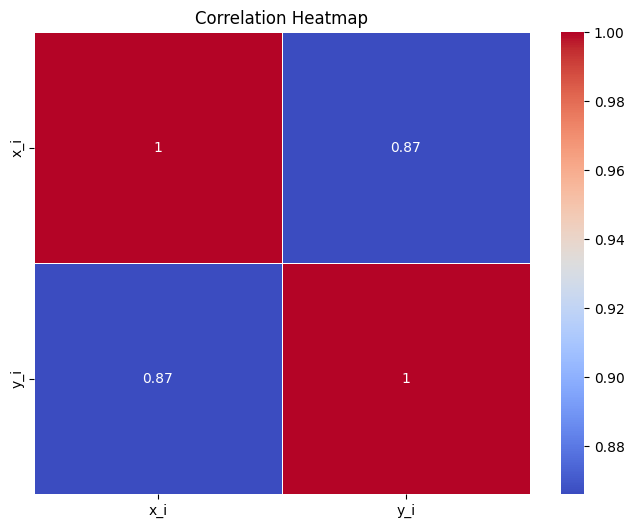

In [9]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()